In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [61]:
df = pd.read_csv('weight-height - weight-height.csv')

In [62]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [63]:
df.shape

(8555, 3)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8555 entries, 0 to 8554
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  8555 non-null   object 
 1   Height  8555 non-null   float64
 2   Weight  8555 non-null   float64
dtypes: float64(2), object(1)
memory usage: 200.6+ KB


In [65]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [66]:
df.describe()

,Height,Weight
count,8555.000000,8555.000000
mean,66.809925,165.632735
std,3.851454,32.043922
min,54.616858,65.780000
25%,63.957684,139.876803
50%,66.985923,168.521567
75%,69.604427,190.666305
max,80.450000,269.989698


In [67]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8550    False
8551    False
8552    False
8553    False
8554    False
Length: 8555, dtype: bool

<Axes: ylabel='count'>

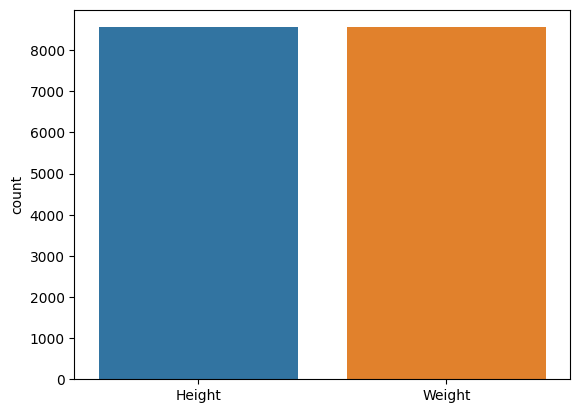

In [68]:
sns.countplot(df)

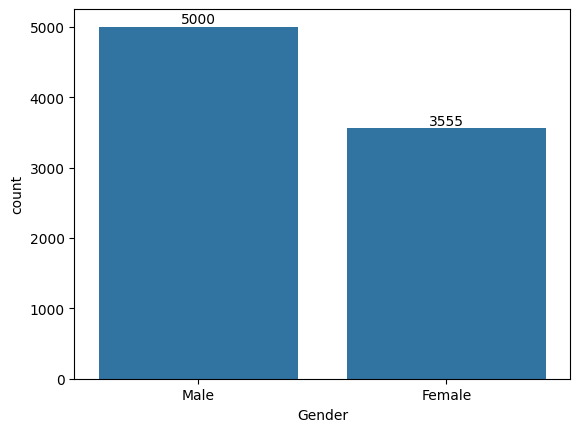

In [69]:
sns.countplot(x=df['Gender'])
for p in plt.gca().patches:
    plt.text(p.get_x()+p.get_width()/2,
            p.get_height()+50,
            int(p.get_height()),
            ha = 'center')
plt.show()

In [70]:
from sklearn.preprocessing import LabelEncoder

In [71]:
le = LabelEncoder()
df.Gender = le.fit_transform(df.Gender)

In [72]:
df.Gender.value_counts()

Gender
1    5000
0    3555
Name: count, dtype: int64

In [73]:
df.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [74]:
from sklearn.preprocessing import StandardScaler

In [75]:
sc = StandardScaler()

In [76]:
df.Height = sc.fit_transform(df[['Height']])

In [77]:
df.head()

,Gender,Height,Weight
0,1,1.827233,241.893563
1,1,0.512039,162.310473
2,1,1.895545,212.740856
3,1,1.277788,220.042470
4,1,0.797634,206.349801


In [78]:
df.Weight = sc.fit_transform(df[['Weight']])

In [79]:
df.head()

,Gender,Height,Weight
0,1,1.827233,2.380023
1,1,0.512039,-0.103684
2,1,1.895545,1.470197
3,1,1.277788,1.698073
4,1,0.797634,1.270738


In [80]:
x = df.drop(['Weight'], axis = 1)

In [81]:
y = df['Weight']

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [84]:
xtrain.head()

,Gender,Height
553,1,0.203599
1397,1,1.244219
7934,0,-1.086391
8367,0,-0.174956
3320,1,1.306955


In [85]:
xtest.shape

(2567, 2)

In [86]:
from sklearn.linear_model import LinearRegression

In [87]:
reg = LinearRegression()
reg.fit(xtrain, ytrain)

LinearRegression()

In [92]:
y_pred = reg.predict(xtest)
y_pred

array([-0.72355092,  0.63725614,  1.02334596, ..., -1.95655179,
        0.7866039 , -0.69548822], shape=(2567,))

In [93]:
reg.score(xtest, ytest)

0.905911242442266

In [94]:
from sklearn.metrics import mean_squared_error

In [96]:
mse = mean_squared_error(ytest, y_pred)
mse

0.09431967622438009

In [97]:
from sklearn.neighbors import KNeighborsRegressor

In [98]:
knn = KNeighborsRegressor()
knn.fit(xtrain, ytrain)

KNeighborsRegressor()

In [99]:
y_predict = knn.predict(xtest)
y_predict

array([-0.73304205,  0.49154265,  0.66905887, ..., -1.99226305,
        0.83653477, -0.63259102], shape=(2567,))

In [100]:
knn.score(xtest, ytest)

0.882118382815514

In [101]:
mse = mean_squared_error(ytest, y_predict)
mse

0.11817092981405929